In [2]:
# Import the libraries

In [3]:
import pandas as pd   # data preprocessing
# pandas is aliased as pd
import numpy as np    # mathematical calculations
# numpy is aliased as np
import matplotlib.pyplot as plt  # visualization
# pyplot is aliased as plt
import seaborn as sns       # visualization
# seaborn is aliased as sns


In [4]:
# Read the dataset

In [5]:
df = pd.read_csv("C:/Users/HP/Downloads/laptop_price_data (1).csv")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [6]:
# Shape

In [7]:
df.shape
# rows=1302,cols=13

(1302, 13)

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [9]:
df1 = df.copy()

## Data Preprocessing
- 1) Handling Null Values

In [10]:
df.isnull().sum()
# Returns the sum of null values for each column

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

- 2) Handling the duplicate rows

In [11]:
df.duplicated().sum()
# Returns the number of duplicates

30

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 3) Checking the datatypes

In [13]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

## 4) Handling Outliers

In [14]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,90%,95%,96%,97%,98%,99%,max
Ram,1272.0,8.451258,5.099249,2.00,2.000000,4.00,4.00000,4.00000,8.00,16.0000,16.00,16.000,16.0000,16.000000,32.000,64.00
Weight,1272.0,2.041761,0.669088,0.69,0.955500,1.08,1.10000,1.17000,2.04,2.8000,3.20,3.358,3.7800,4.300000,4.420,4.70
Price,1272.0,60520.657755,37355.685811,9270.72,12960.514512,14119.20,15251.24016,17214.52824,52693.92,109170.1872,130482.72,136599.264,145283.3712,153350.208288,167855.976,324954.72
Touchscreen,1272.0,0.147013,0.354258,0.00,0.000000,0.00,0.00000,0.00000,0.00,1.0000,1.00,1.000,1.0000,1.000000,1.000,1.00
Ips,1272.0,0.279874,0.449114,0.00,0.000000,0.00,0.00000,0.00000,0.00,1.0000,1.00,1.000,1.0000,1.000000,1.000,1.00
HDD,1272.0,414.040881,518.128204,0.00,0.000000,0.00,0.00000,0.00000,0.00,1000.0000,1000.00,1000.000,1000.0000,2000.000000,2000.000,2000.00
SSD,1272.0,186.298742,186.597777,0.00,0.000000,0.00,0.00000,0.00000,256.00,512.0000,512.00,512.000,512.0000,512.000000,1000.000,1024.00


## Boxplots for Outliers

In [15]:
print(df.shape)
df.columns

(1272, 12)


Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

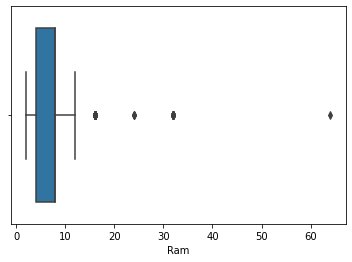

In [16]:
sns.boxplot(x=df['Ram'])
plt.show()

In [17]:
print(df[df['Ram']<20].shape)
print(df[df['Ram']>12].shape[0]/df.shape[0])

(1251, 12)
0.1721698113207547


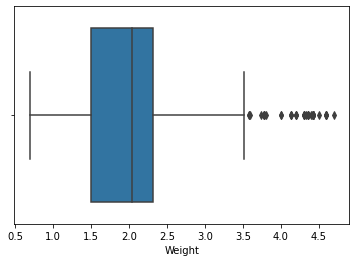

In [18]:
sns.boxplot(x=df['Weight'])
plt.show()

In [19]:
df[df['Weight']>3.5].shape

(46, 12)

## Outlier Clipping..

In [20]:
df['Weight'] = np.where(df['Weight']>3.5,3.5,df['Weight'])

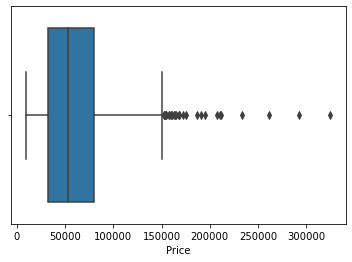

In [21]:
sns.boxplot(x=df['Price'])
plt.show()

In [22]:
df[df['Price']>200000].shape

(7, 12)

In [23]:
df[df['Price']>150000].head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
17,Apple,Ultrabook,16,1.83,152274.24,0,1,Intel Core i7,0,512,AMD,Mac
190,Lenovo,2 in 1 Convertible,16,1.42,150462.72,1,0,Intel Core i7,0,1000,Intel,Windows
196,Razer,Gaming,32,3.49,324954.72,1,0,Intel Core i7,0,1000,Nvidia,Windows
204,Dell,Workstation,16,2.80,162770.40,0,0,Other Intel Processor,1000,256,Nvidia,Windows
238,Asus,Gaming,32,3.50,207259.20,0,0,Intel Core i7,1000,512,Nvidia,Windows


In [24]:
# df['Price'] = np.where(df['Price']>167855.976,167855.976,df['Price'])

## EDA

### Top 8 Different Laptop Companies with highest count.

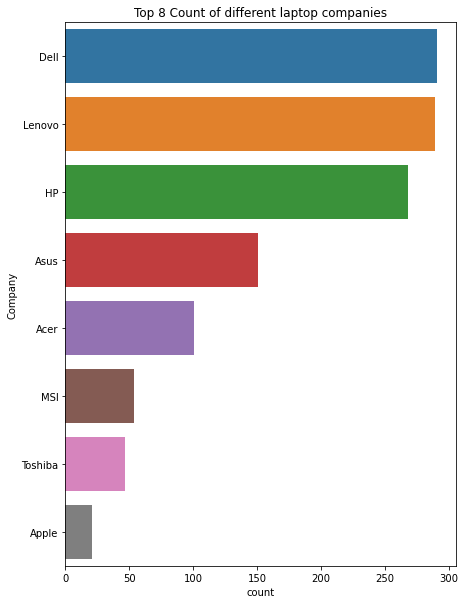

In [25]:
plt.figure(figsize=(7,10))
sns.countplot(y=df['Company'],
              order=df['Company'].value_counts().sort_values(ascending=False)[:8].index)
plt.title('Top 8 Count of different laptop companies')
plt.show()

In [26]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

## Count of TypeName

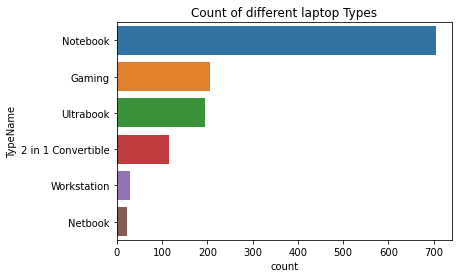

In [27]:
# plt.figure(figsize=(7,10))
sns.countplot(y=df['TypeName'],
              order=df['TypeName'].value_counts().sort_values(ascending=False).index)
plt.title('Count of different laptop Types')
plt.show()

## Count of CPU Brand..

In [28]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

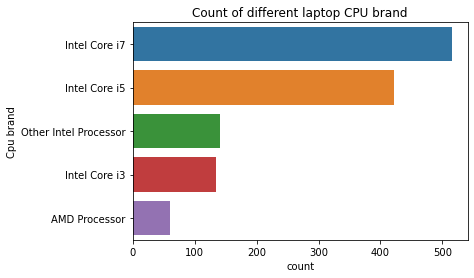

In [29]:
sns.countplot(y=df['Cpu brand'],
              order=df['Cpu brand'].value_counts().sort_values(ascending=False).index)
plt.title('Count of different laptop CPU brand')
plt.show()

## Count of GPU Brand...

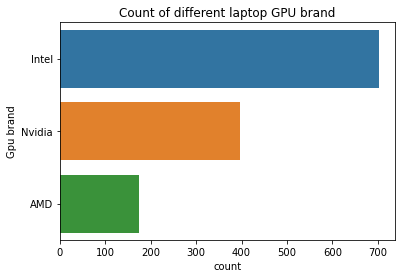

In [30]:
sns.countplot(y=df['Gpu brand'],
              order=df['Gpu brand'].value_counts().sort_values(ascending=False).index)
plt.title('Count of different laptop GPU brand')
plt.show()

## Boxplot for Price for differnet Cpu Brands...

In [31]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

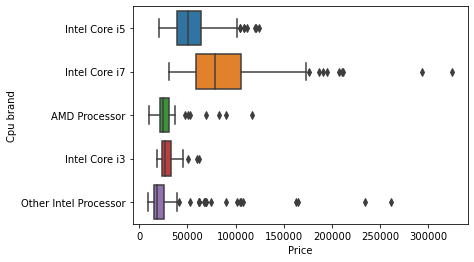

In [32]:
sns.boxplot(y=df['Cpu brand'],x=df['Price'])
plt.show()

## Boxplot for GPU brand vs Price

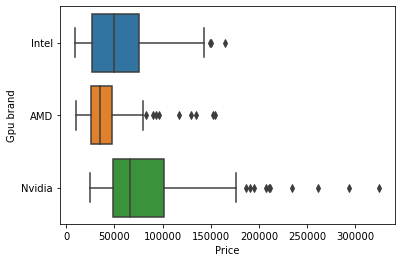

In [33]:
sns.boxplot(y=df['Gpu brand'],x=df['Price'])
plt.show()

## Distplot for Price

c:\Users\HP\anaconda3\G\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


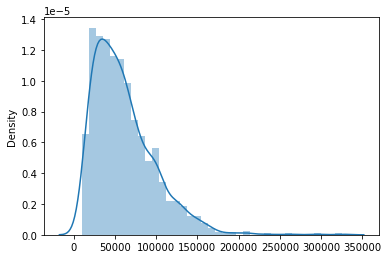

In [34]:
sns.distplot(x=df['Price'])
plt.show()

## Checking Correlation amongst the columns..

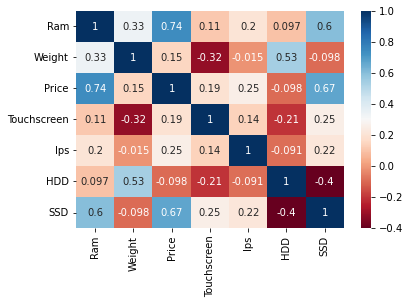

In [35]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

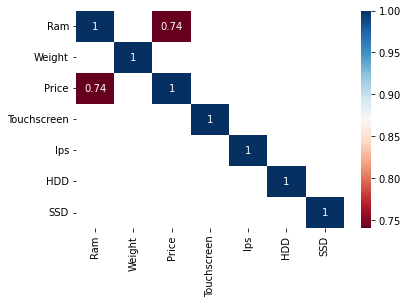

In [36]:
corr = df.corr()
corr = corr[corr>0.7]
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Inference
### High Correlation does not exist amongst the independent features.

In [37]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


## Select the dependent and Independent features.

In [38]:
x = df.drop('Price',axis=1)
y = df['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1272, 11)
(1272,)


## Split the data into train and test.

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(954, 11)
(318, 11)
(954,)
(318,)


## Create function to evaluate the model in terms of R2_Score, MSE, RMSE, MAE

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [41]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

## Import the ML Reg libraries

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Import the necessary sklearn transformational libraries

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [44]:
print(x.columns)
x.head(2)

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')


,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,0,0,Intel,Mac


## 1) Linear Regression

In [45]:
step1 = ColumnTransformer(transformers=
                         [('col_transf',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 13940.90130914854
MSE 409547387.300399
RMSE 20237.277171111706
R2_Score 0.7020504611099356


## 2) Ridge Regression

In [46]:
step1 = ColumnTransformer(transformers=
                         [('col_transf',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = Ridge(alpha=10)

pipe_ridge = Pipeline([('step1',step1),('step2',step2)])

pipe_ridge.fit(x_train,y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model(y_test,ypred_ridge)

MAE 13661.794320175602
MSE 393320839.5639611
RMSE 19832.31805825938
R2_Score 0.7138554257264065


## 3)Lasso Regression

In [47]:
step1 = ColumnTransformer(transformers=
                         [('col_transf',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = Lasso(alpha=0.1)

pipe_lasso = Pipeline([('step1',step1),('step2',step2)])

pipe_lasso.fit(x_train,y_train)

ypred_lasso = pipe_lasso.predict(x_test)

eval_model(y_test,ypred_lasso)

MAE 13938.920406094996
MSE 409444854.35012686
RMSE 20234.743743129708
R2_Score 0.7021250547862767


## 4) KNN Regression

In [48]:
step1 = ColumnTransformer(transformers=
                         [('col_transf',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)

pipe_knn = Pipeline([('step1',step1),('step2',step2)])

pipe_knn.fit(x_train,y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model(y_test,ypred_knn)

MAE 13343.511894339623
MSE 424375257.72532666
RMSE 20600.370329810255
R2_Score 0.6912630472652264


## 5) DT Regression

In [49]:
step1 = ColumnTransformer(transformers=
                         [('col_transf',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=15)

pipe_dt = Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

MAE 12494.040137810434
MSE 337765355.9831737
RMSE 18378.3937269603
R2_Score 0.7542725574894004


## 6) RF Regression

In [50]:
x.head(3)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux


In [51]:
step1 = ColumnTransformer(transformers=
                         [('col_transf',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,
                              min_samples_split=11,random_state=5)

pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

MAE 11387.353450533621
MSE 284154451.6936889
RMSE 16856.881434407995
R2_Score 0.7932749897056632


## Inference
### Ranodm Forest is the best performing model in terms of R2_Score and RMSE

## Saving the model and the DataFrame..

In [52]:
import pickle

In [53]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [54]:
pickle.dump(pipe_rf,open('rf2.pkl','wb')) # saving the best performing model
pickle.dump(df,open('data2.pkl','wb'))  # saving the dataframe

In [55]:
x_train.shape

(954, 11)

In [56]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [57]:
df['HDD'].value_counts()

0       713
1000    400
500     125
2000     32
32        1
128       1
Name: HDD, dtype: int64

In [58]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [59]:
print(df['HDD'].unique())
print(df['SSD'].unique())
print(df['Ram'].unique())

[   0  500 1000 2000   32  128]
[ 128    0  256  512   32   64 1000 1024   16  768  180  240    8]
[ 8 16  4  2 12  6 32 24 64]


In [60]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [61]:
x_train.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')